# Explore here

In [81]:
# Your code here
import pandas as pd
import os 
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [82]:
with zipfile.ZipFile("housing-price-prediction.zip", "r") as zip_ref:
    zip_ref.extractall("housing_price_data")

file_path = os.path.join("housing_price_data", "Housing.csv")

In [83]:
df = pd.read_csv("housing_price_data/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [85]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [86]:
df.duplicated().sum()

np.int64(0)

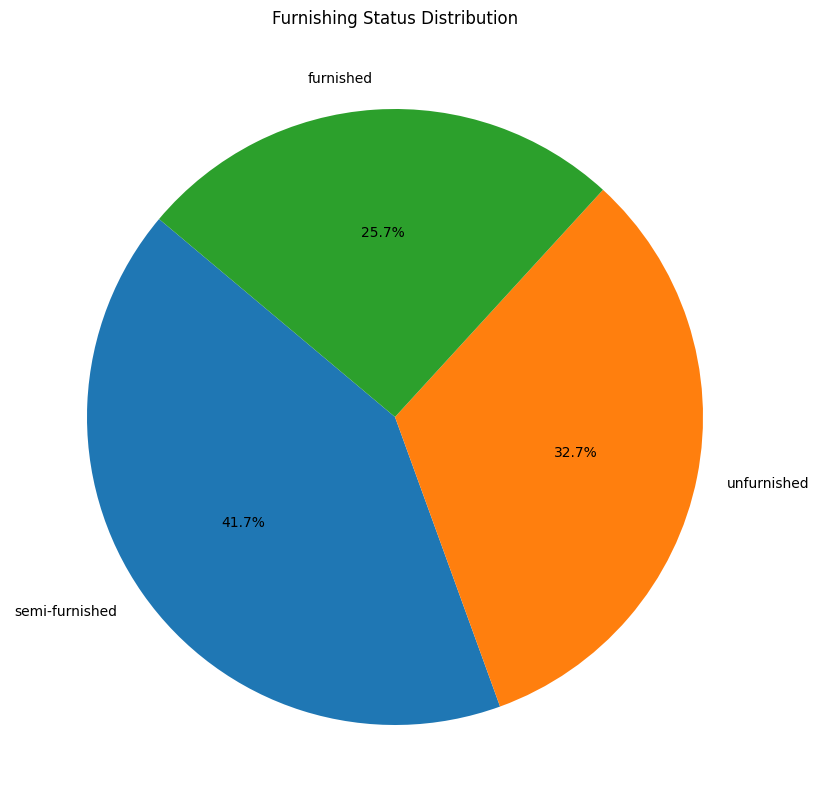

In [87]:
furnishing_counts = df['furnishingstatus'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Furnishing Status Distribution')
plt.show()

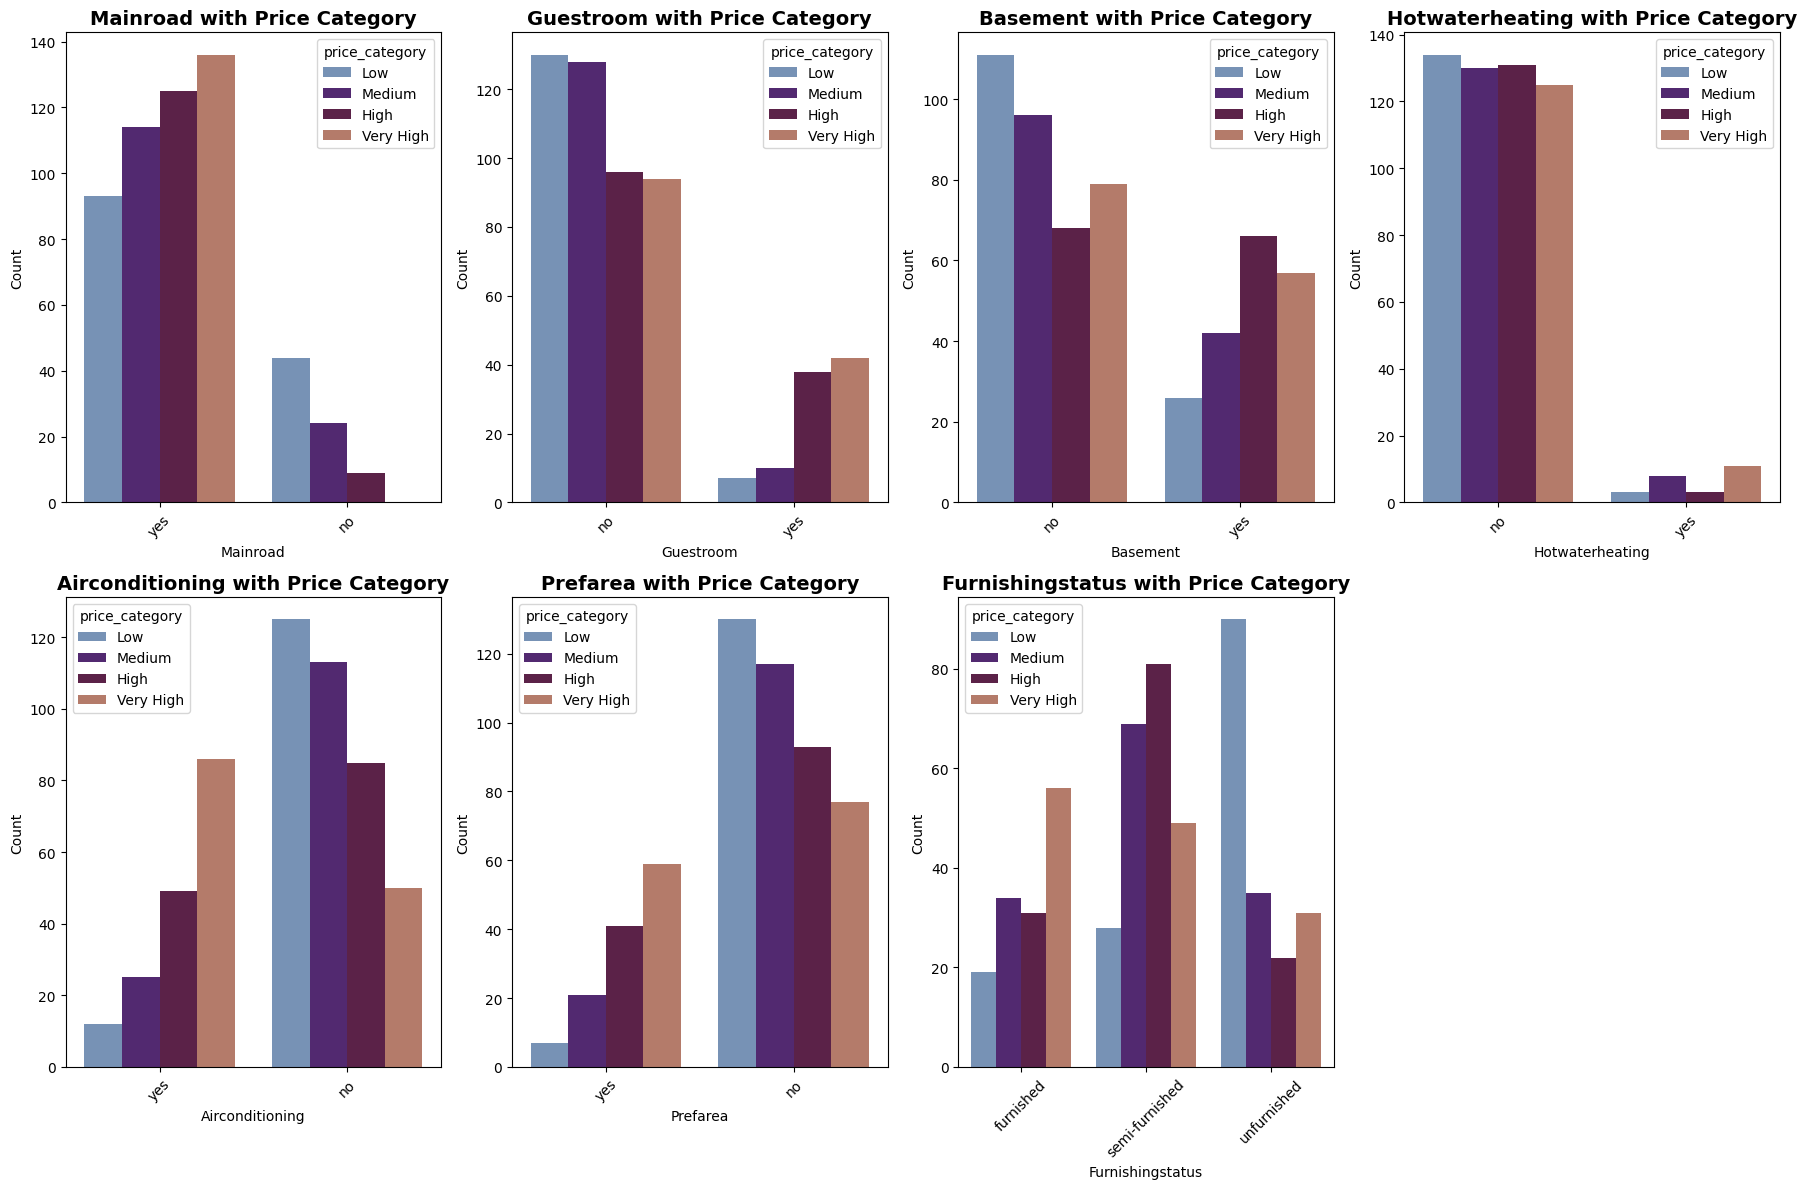

In [88]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

price_bins = pd.qcut(df['price'], q=4, labels=["Low", "Medium", "High", "Very High"])

df['price_category'] = price_bins

fig, axes = plt.subplots(nrows=2, ncols=(len(categorical_columns) + 1) // 2, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, hue='price_category', palette="twilight", ax=axes[idx], dodge=True)
    axes[idx].set_title(f"{col.capitalize()} with Price Category", fontdict={'fontsize': 14}, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel("Count")
    axes[idx].tick_params(axis='x', rotation=45)

for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


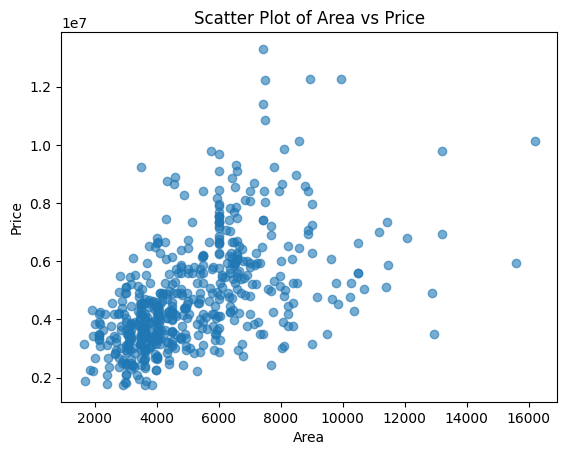

In [89]:
plt.scatter(df['area'], df['price'], alpha=0.6)
plt.title('Scatter Plot of Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

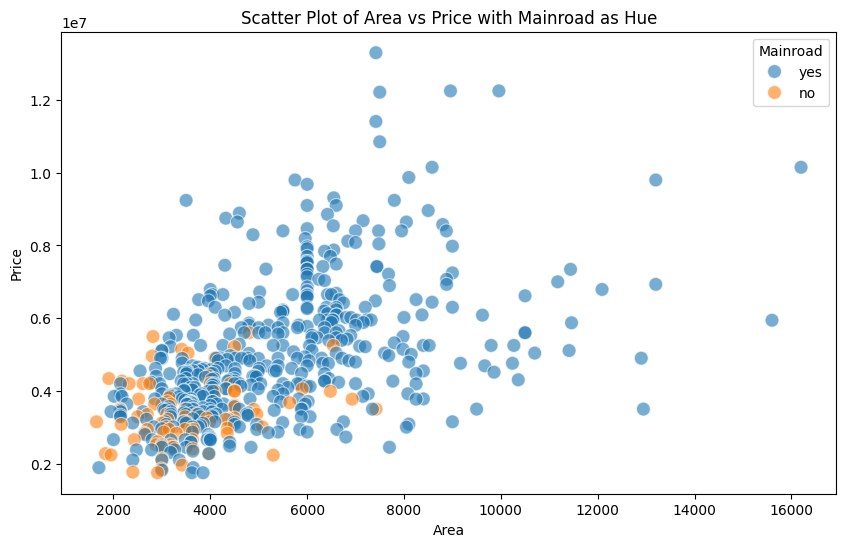

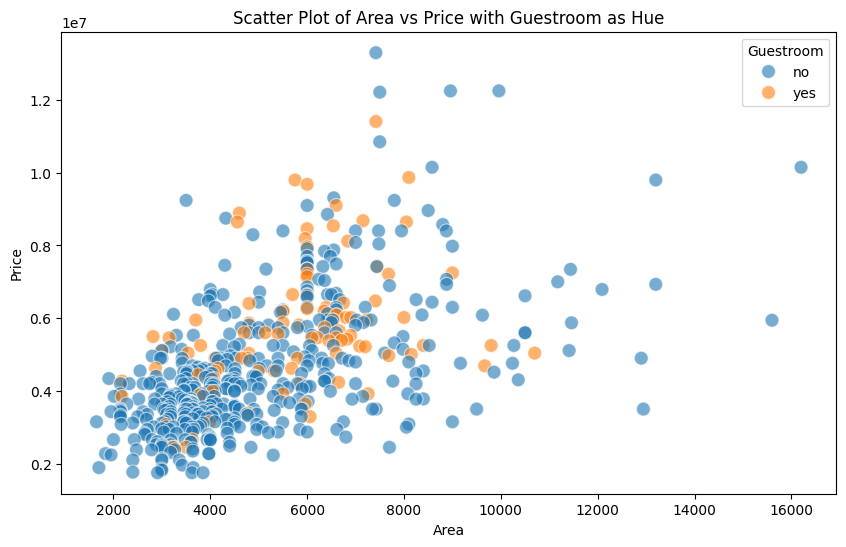

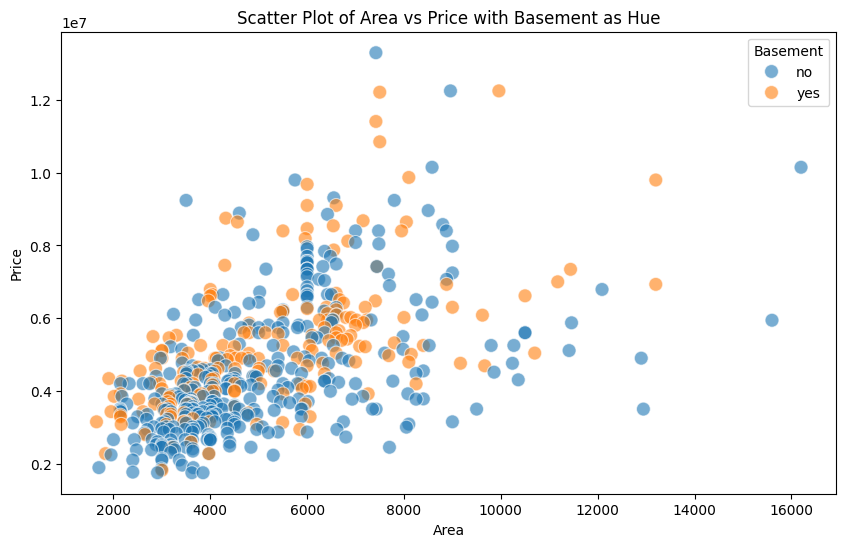

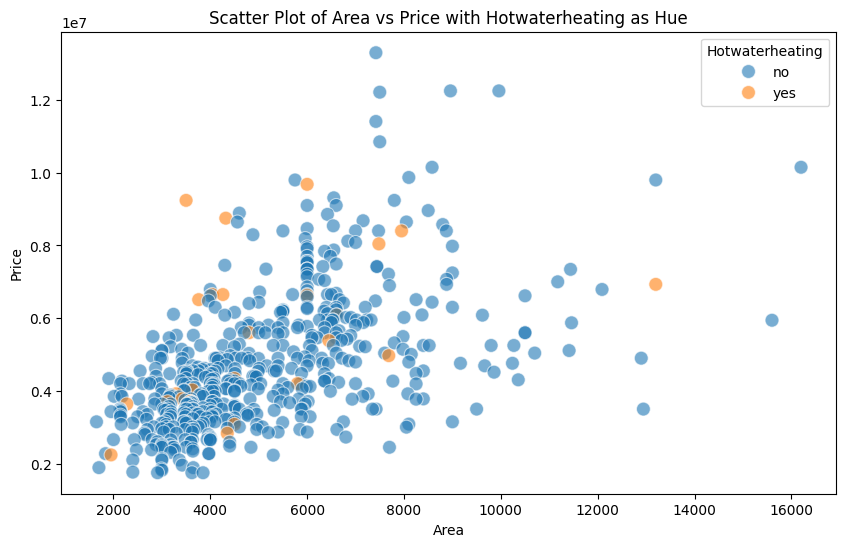

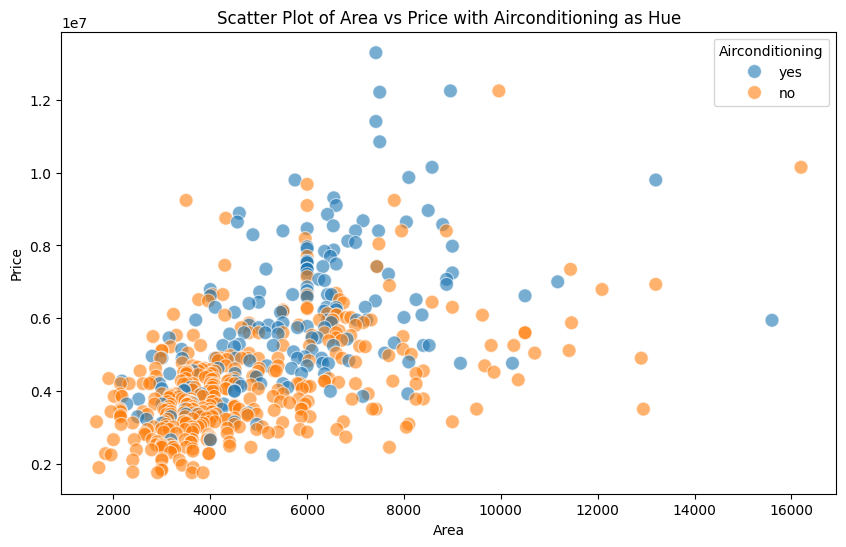

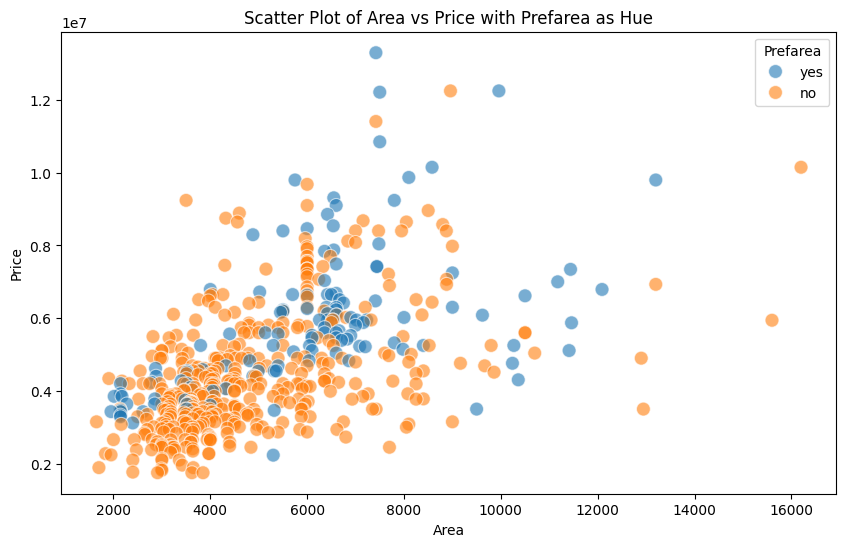

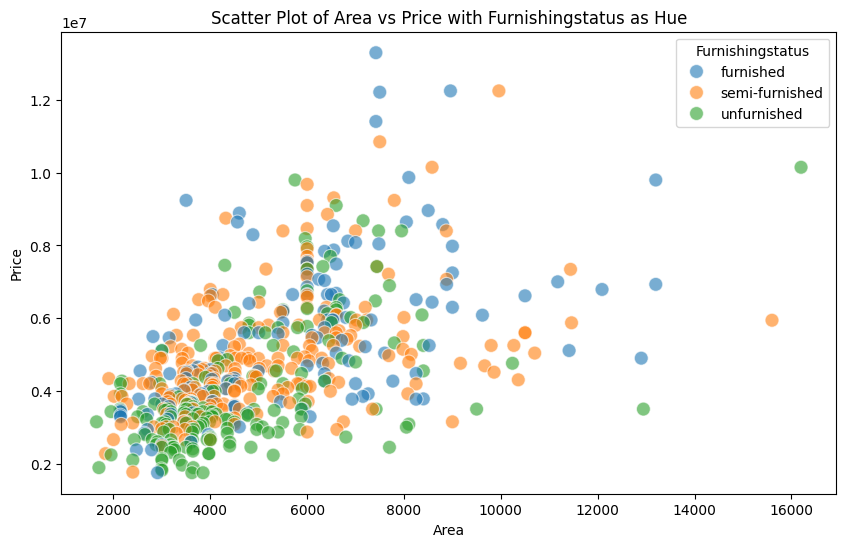

In [90]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='area', y='price', hue=col, alpha=0.6 , s=100)
    plt.title(f'Scatter Plot of Area vs Price with {col.capitalize()} as Hue')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.legend(title=col.capitalize())
    plt.show()

In [91]:
encoded_data = df.copy()

categorical_columns = encoded_data.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le 


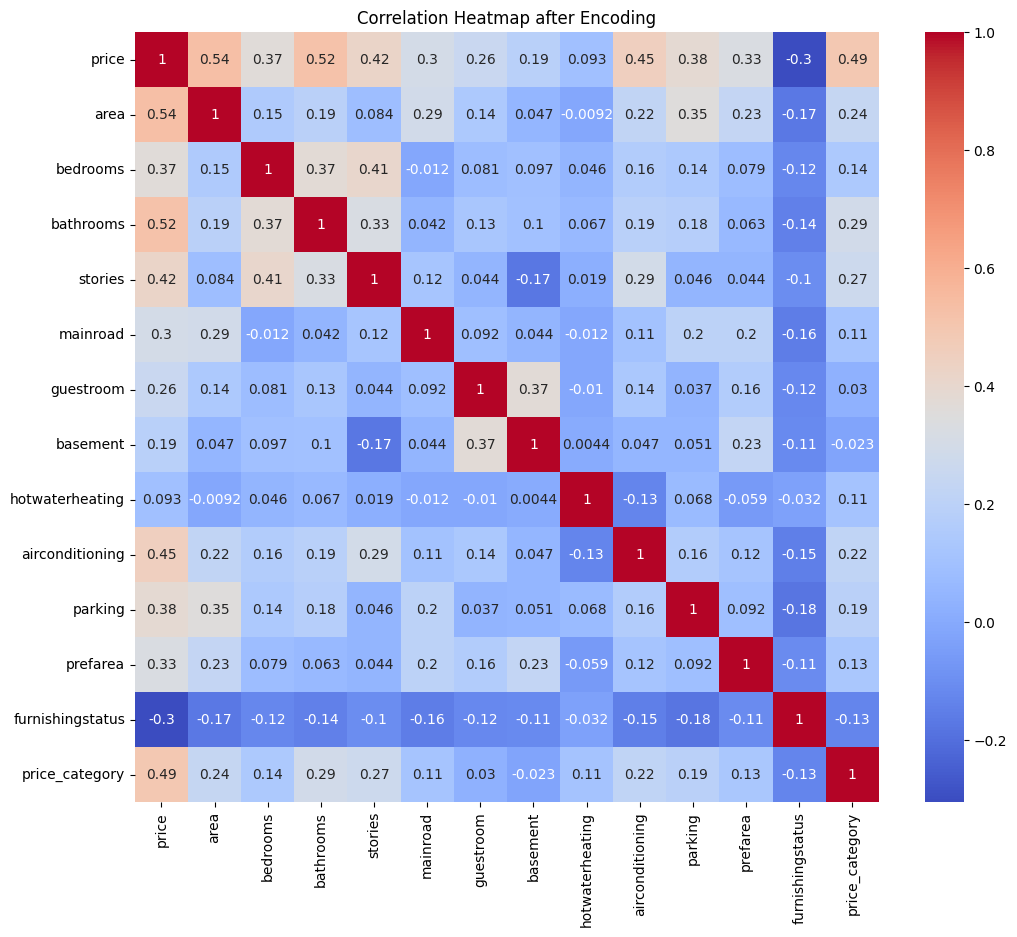

In [92]:
correlation_matrix = encoded_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap after Encoding')
plt.show()

In [93]:
X = encoded_data.drop(columns=['price']) 
y = encoded_data['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4
)
rf_model.fit(X_train_scaled, y_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nResultados del modelo:")
print(f"Train R2 Score: {train_r2:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")
print(f"MAE (Test): {test_mae:.4f}")
print(f"RMSE (Test): {test_rmse:.4f}")




Resultados del modelo:
Train R2 Score: 0.9209
Test R2 Score: 0.8453
MAE (Test): 536095.2356
RMSE (Test): 884356.7788


In [96]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse = -1 * cv_scores.mean()
print(f"Cross-validation RMSE: {cv_rmse:.4f}")



Cross-validation RMSE: 713271.3534


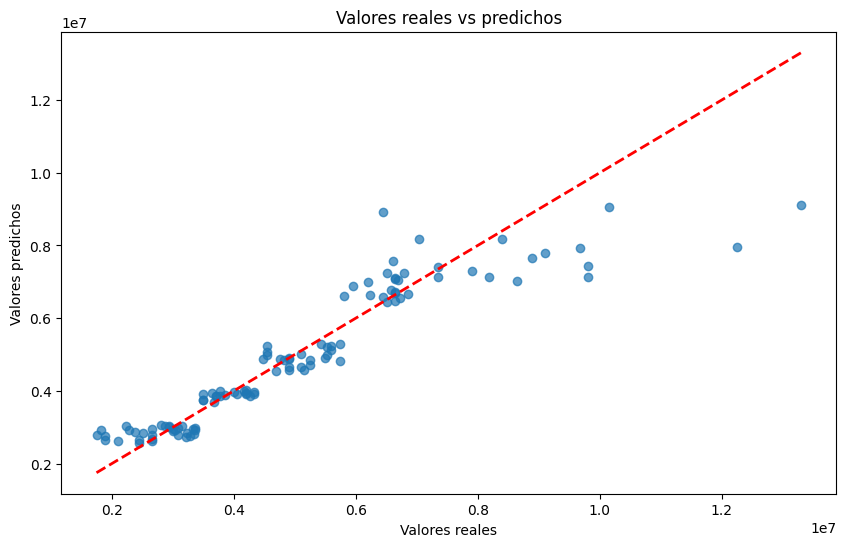

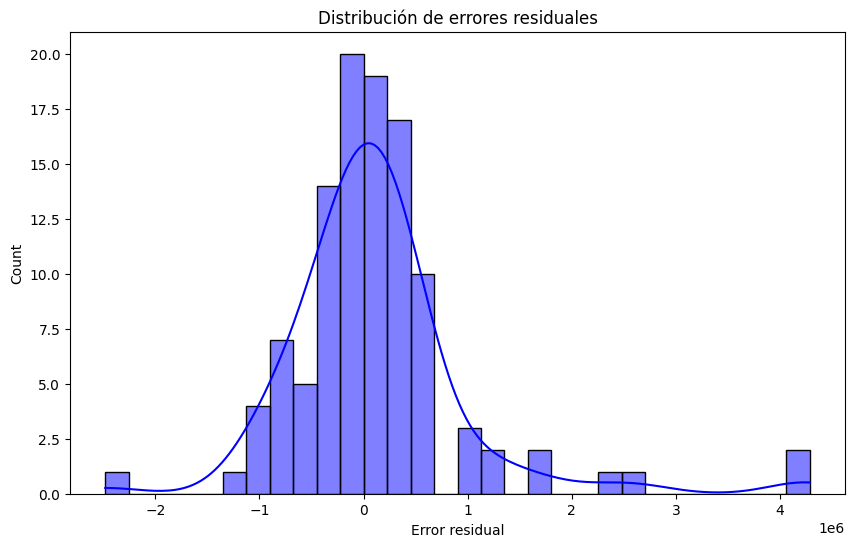

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs predichos")
plt.show()

residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.xlabel("Error residual")
plt.title("Distribución de errores residuales")
plt.show()

In [98]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [99]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [100]:
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)